In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




In [32]:
# Load dataset
df = pd.read_csv('SuperMarket Analysis.csv')



In [33]:
# --- Step 1: Basic Info ---
print(df.info())
print(df.describe())
print(df.head())
print(df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

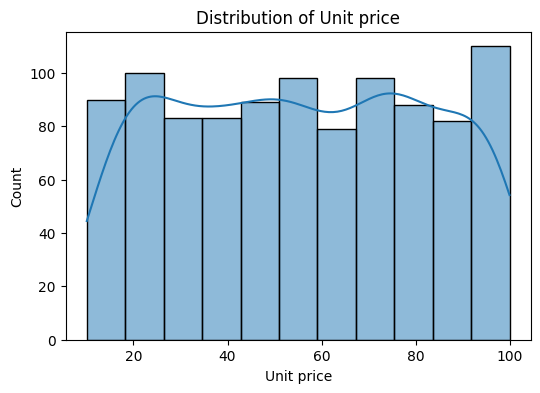

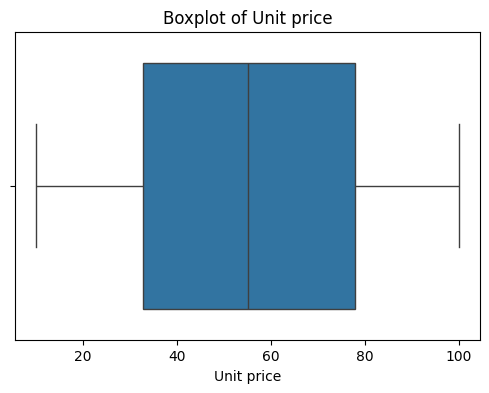

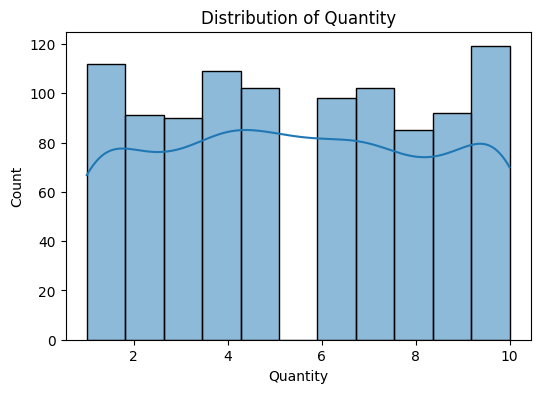

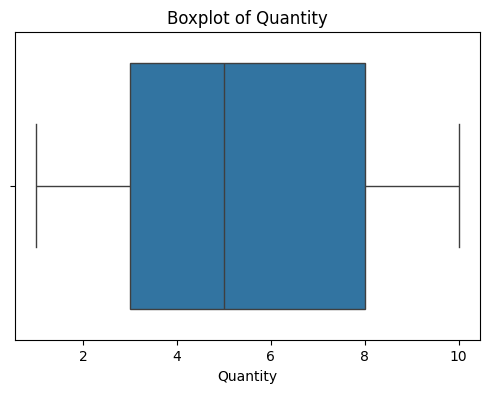

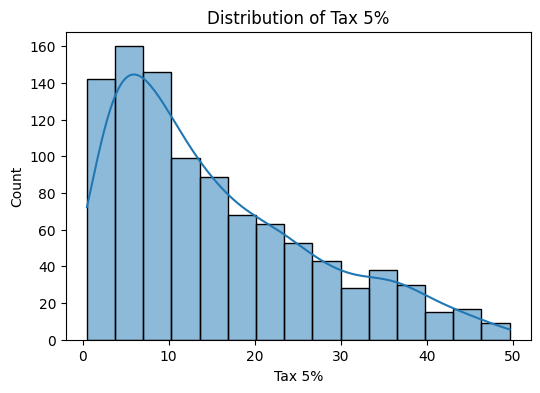

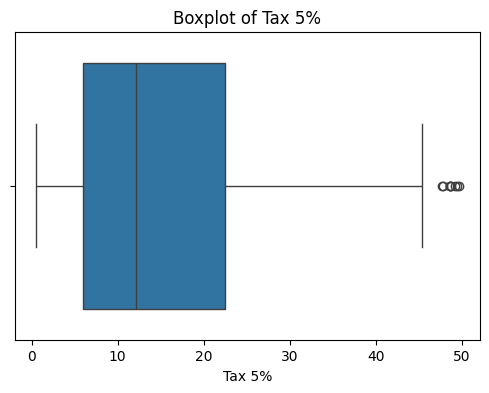

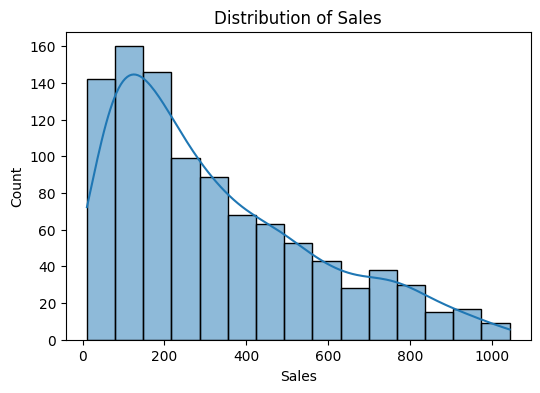

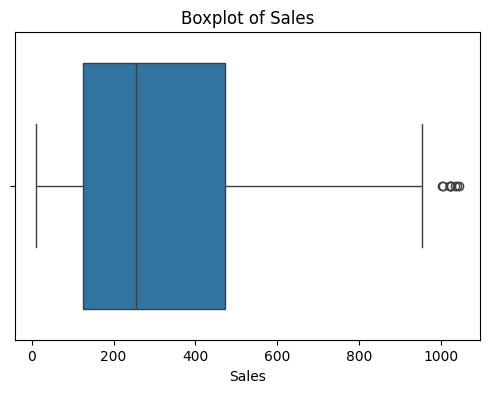

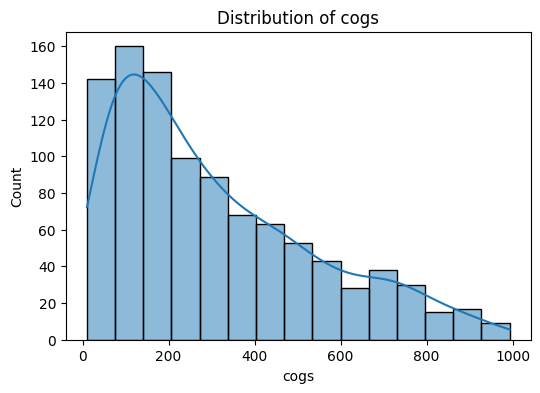

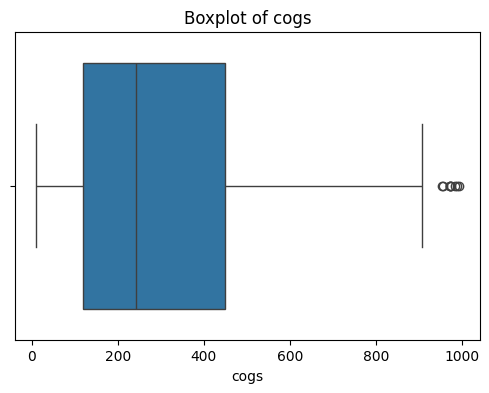

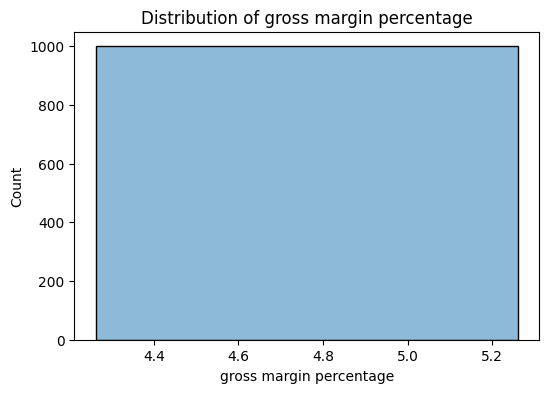

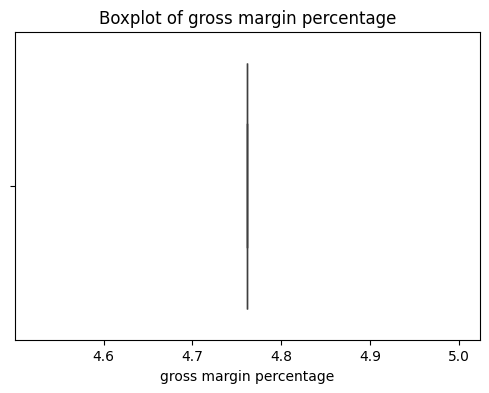

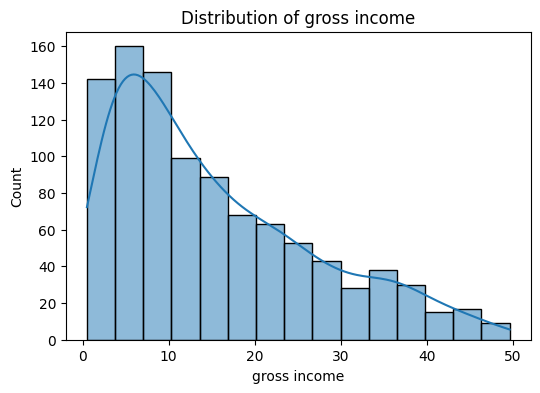

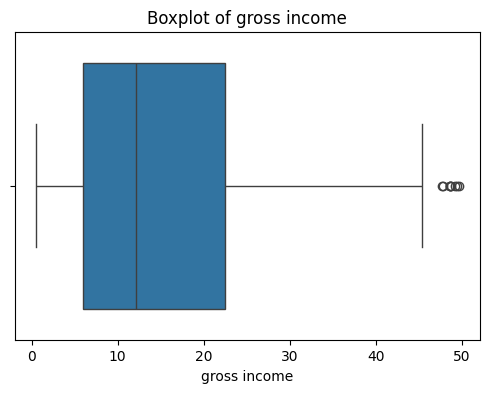

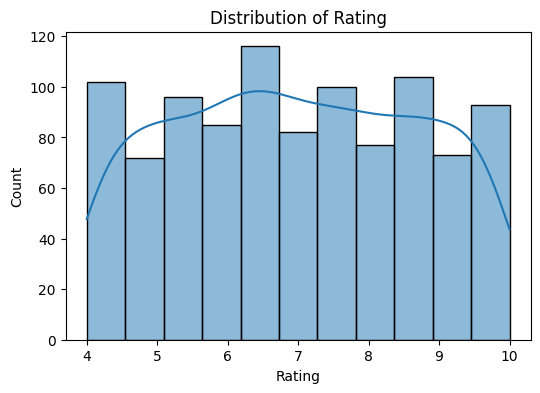

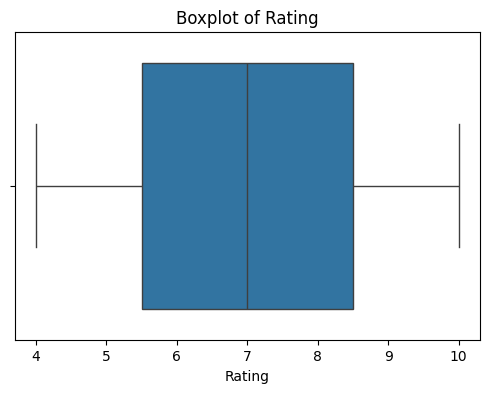

In [34]:
# --- Step 2: Univariate Analysis ---
numerical_cols = ['Unit price','Quantity','Tax 5%','Sales','cogs','gross margin percentage','gross income','Rating']
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()




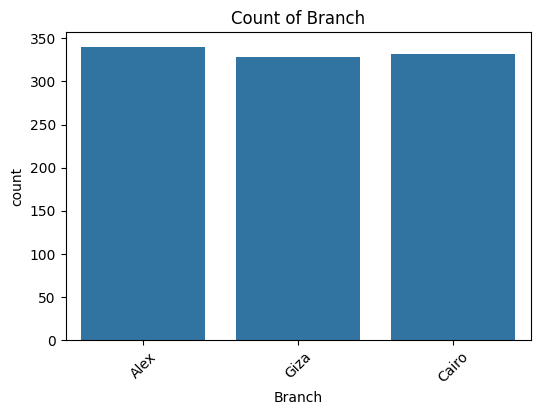

Branch
Alex     340
Cairo    332
Giza     328
Name: count, dtype: int64


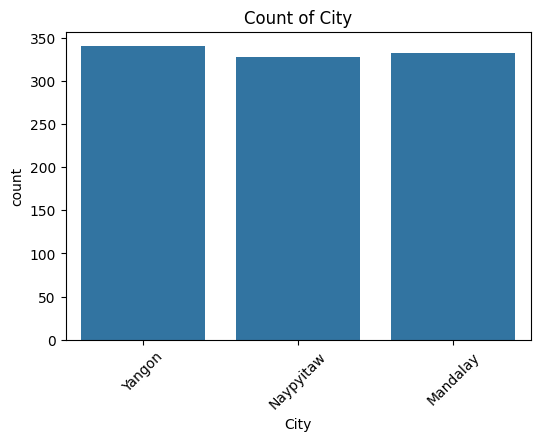

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64


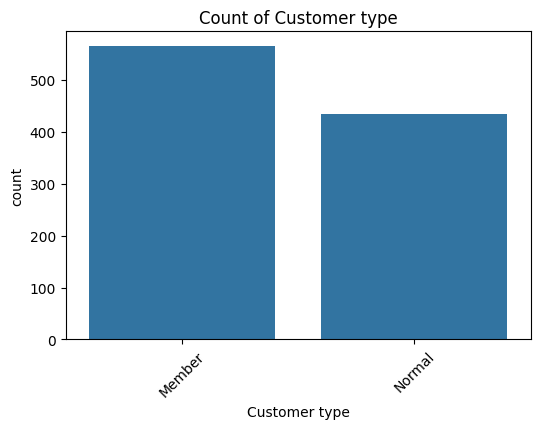

Customer type
Member    565
Normal    435
Name: count, dtype: int64


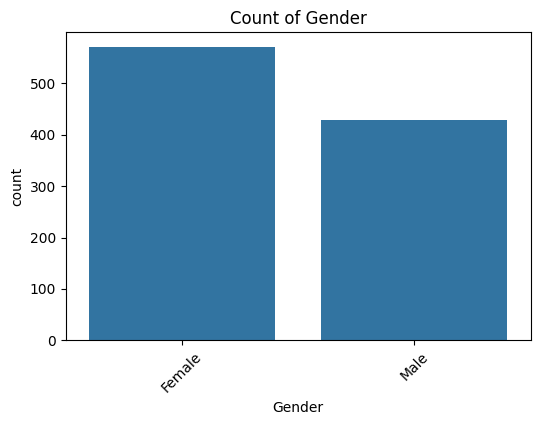

Gender
Female    571
Male      429
Name: count, dtype: int64


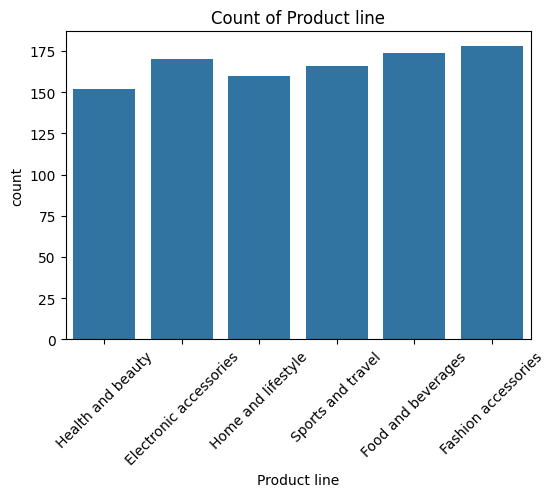

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64


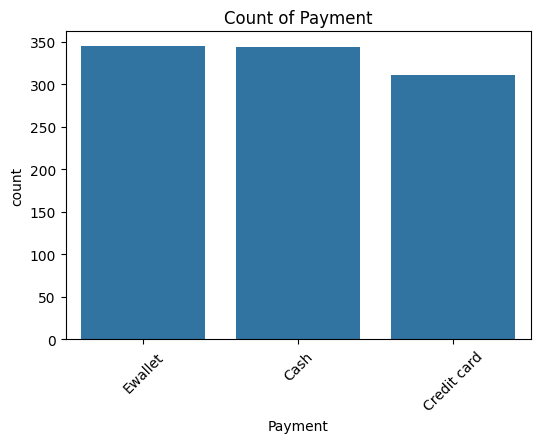

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


In [35]:
categorical_cols = ['Branch','City','Customer type','Gender','Product line','Payment']
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()
    print(df[col].value_counts())


Product line
Home and lifestyle        336.636956
Sports and travel         332.065220
Health and beauty         323.643020
Food and beverages        322.671517
Electronic accessories    319.632538
Fashion accessories       305.089298
Name: Sales, dtype: float64


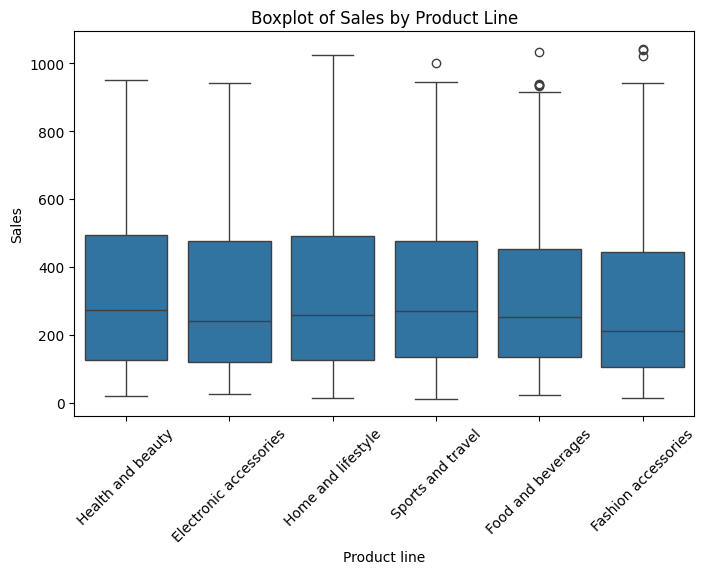

In [36]:
# --- Step 3: Bivariate Analysis ---
# Average sales by product line
sales_by_product = df.groupby('Product line')['Sales'].mean().sort_values(ascending=False)
print(sales_by_product)

plt.figure(figsize=(8,5))
sns.boxplot(x='Product line', y='Sales', data=df)
plt.xticks(rotation=45)
plt.title('Boxplot of Sales by Product Line')
plt.show()





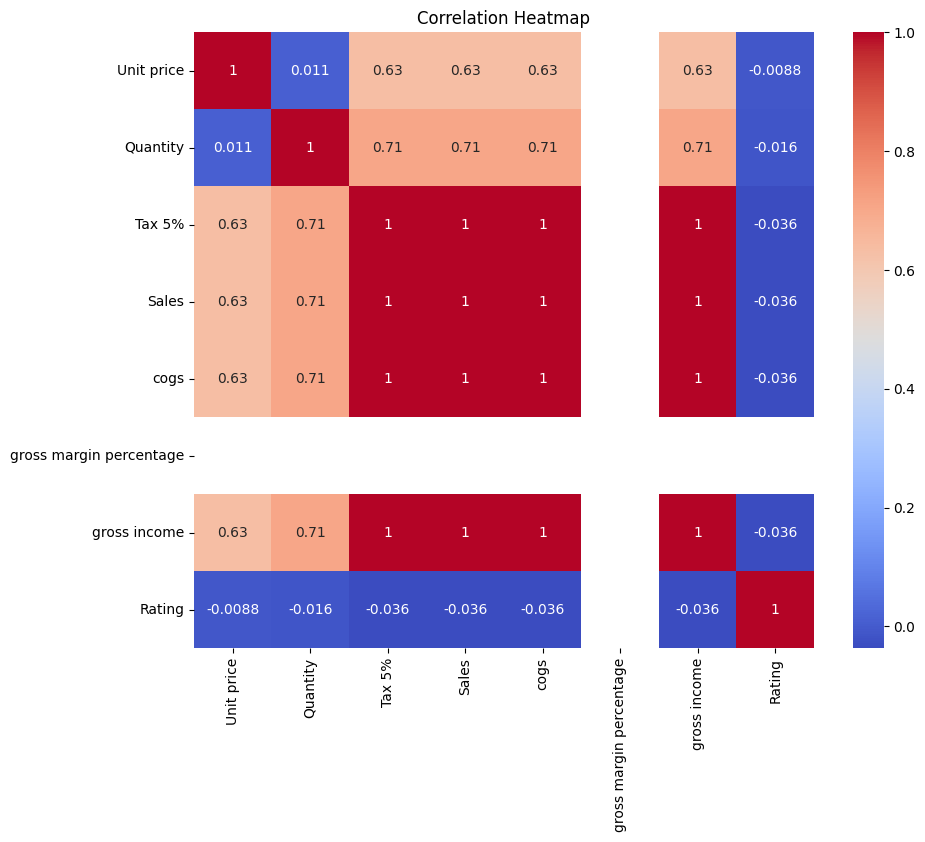

In [37]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



Gender              Female        Male
Customer type                         
Member         125206.1370  64488.6270
Normal          69465.7005  63806.2845


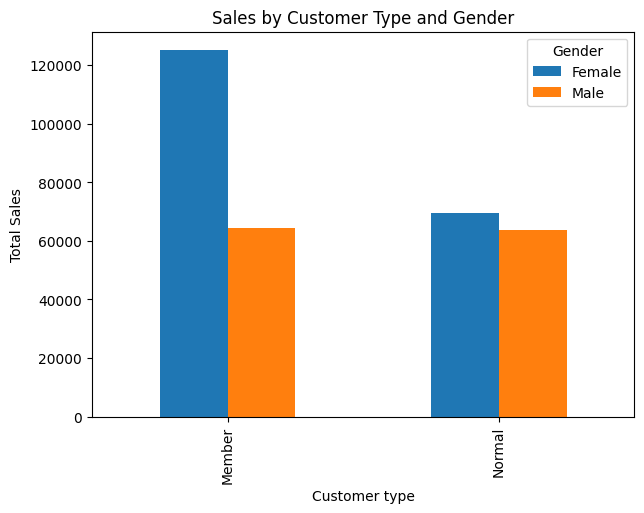

In [38]:
# Segment analysis: Sales by Customer Type and Gender
segment_sales = df.groupby(['Customer type','Gender'])['Sales'].sum().unstack()
print(segment_sales)
segment_sales.plot(kind='bar', figsize=(7,5))
plt.title('Sales by Customer Type and Gender')
plt.ylabel('Total Sales')
plt.show()


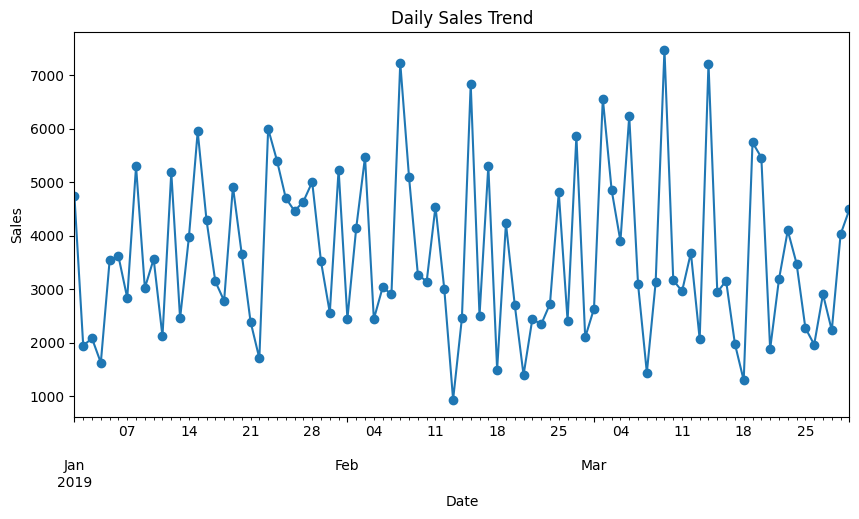

In [39]:
# --- Step 4: Time-Based Analysis ---
df['Date'] = pd.to_datetime(df['Date'])
daily_sales = df.groupby('Date')['Sales'].sum()
daily_sales.plot(figsize=(10,5), marker='o')
plt.title('Daily Sales Trend')
plt.ylabel('Sales')
plt.show()